# 2D convolutions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture


(-0.5, 496.5, 371.5, -0.5)

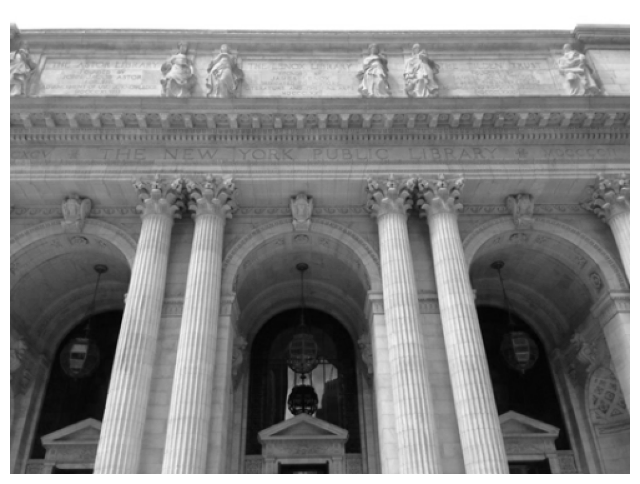

In [8]:
# write here the import path of the image
image_path = "./NYlibrary.png"

v = np.mean(imread(image_path), axis=2)

plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

Consider the following kernels


In [5]:
kernel_blur1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10, 10)) / 100

kernel_edge1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_edge2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_edge3 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

kernel_sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel_drunk = np.random.randn(50, 50)

Choose here the desired filter $\mathbf{k}$


In [6]:
k = kernel_blur1

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.


## 1. Direct definition (sums of products)

Convolution without "boundary layers"


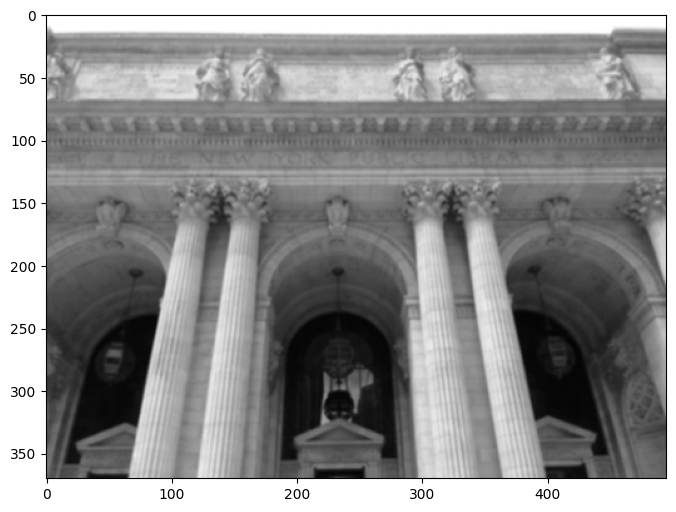

In [14]:
sv = np.array(v.shape)
sk = np.array(k.shape)

s_out = sv - sk + 1
conv_v1 = np.empty(s_out)

for i in range(s_out[0]):
    for j in range(s_out[1]):
        conv_v1[i,j] = np.sum(np.flip(k) * v[i : i + sk[0], j : j + sk[1]])

        
plt.imshow(conv_v1, cmap="gray", vmin=vmin, vmax=vmax)

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.


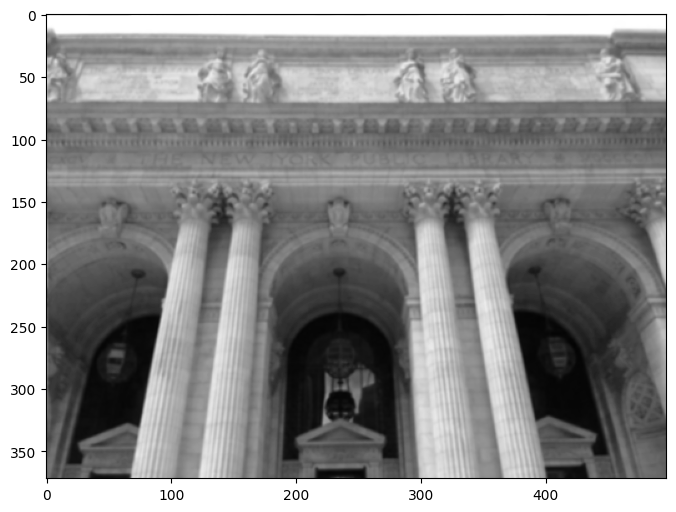

In [17]:
v_fft = np.fft.fft2(v)
k_fft = np.fft.fft2(k, v.shape)
vk_fft = v_fft * k_fft
conv_v2 = np.real(np.fft.ifft2(vk_fft))
plt.imshow(conv_v2, cmap="gray", vmin=vmin, vmax=vmax)


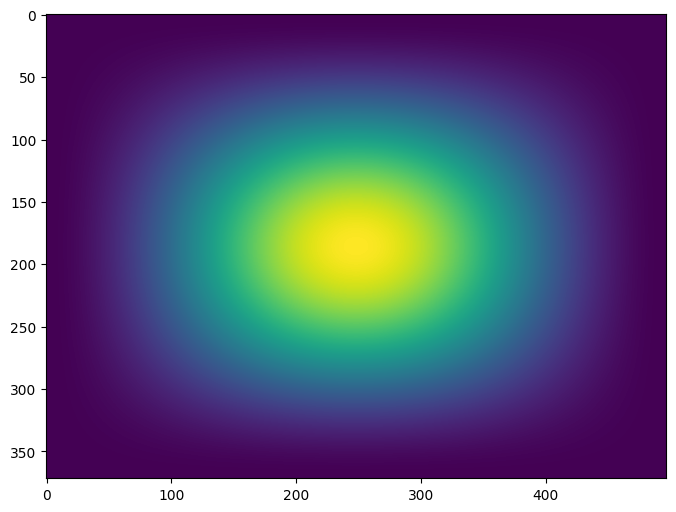

In [20]:
plt.imshow(np.fft.fftshift(np.absolute(k_fft)))

## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).
